In [1]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
geo_df = pd.read_csv('../data/review_sentiments_geo.csv')
geo_df['State'] = geo_df['State'].replace('New_York', 'New York')
geo_df.head()

,State,Price,Service,Ambience,Food
0,New York,95.288551,97.628863,92.234720,88.897945
1,New York,93.299860,95.128507,93.034507,85.638448
2,New York,-82.298439,-84.439832,-69.404452,-66.739477
3,New York,87.124357,96.371484,89.717136,84.821187
4,New York,-87.897039,-83.790696,-60.608087,-99.370605


In [3]:
melted_df = geo_df.melt(id_vars='State',
                    value_vars=['Price', 'Service', 'Ambience', 'Food'],
                    var_name='Aspect',
                    value_name='Sentiment Score')
melted_df.dropna(inplace=True)
melted_df.reset_index(drop=True, inplace=True)
melted_df.head()

,State,Aspect,Sentiment Score
0,New York,Price,95.288551
1,New York,Price,93.299860
2,New York,Price,-82.298439
3,New York,Price,87.124357
4,New York,Price,-87.897039


In [4]:
aspect_color_palette = {
    'Price': '#34C759',     # Green
    'Service': '#FFD60A',   # Yellow
    'Ambience': '#FF3B30',  # Red
    'Food': '#007AFF'       # Blue
}

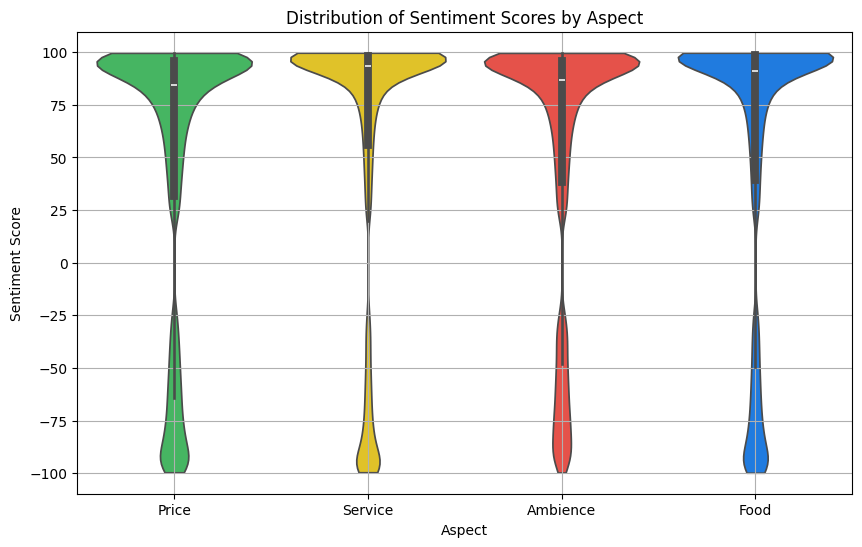

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Aspect', y='Sentiment Score', data=melted_df, cut=0, hue='Aspect', palette=aspect_color_palette, legend=False)
plt.title('Distribution of Sentiment Scores by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.savefig('../imgs/violin_plot.png', dpi=300)
plt.show()
plt.close()

In [6]:
state_color_palette = {
    'New York': '#007AFF',      # Blue
    'California': '#FFD60A',    # Yellow
    'Texas': '#FF3B30',         # Red
}

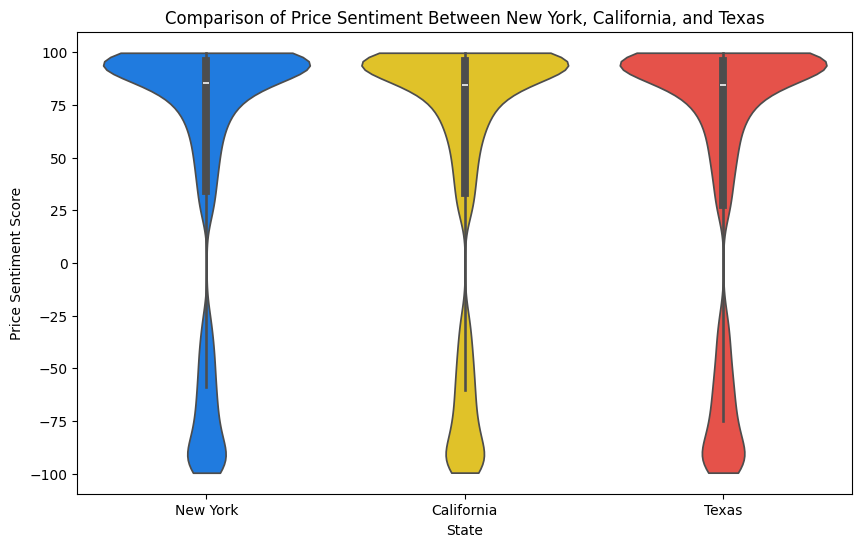

In [7]:
price_data = melted_df[melted_df['Aspect'] == 'Price']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=price_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Price Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Price Sentiment Score')
plt.savefig('../imgs/price_comparison.png', dpi=300)
plt.show()
plt.close()

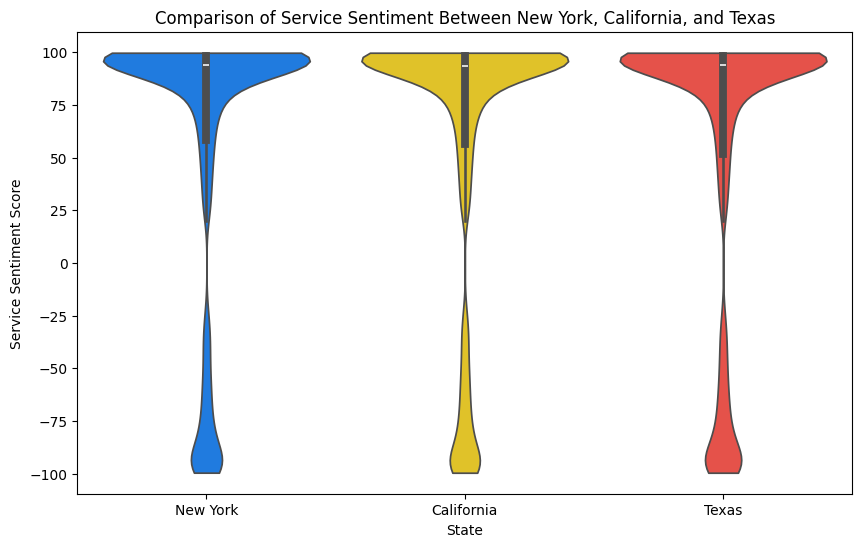

In [8]:
service_data = melted_df[melted_df['Aspect'] == 'Service']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=service_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Service Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Service Sentiment Score')
plt.savefig('../imgs/service_comparison.png', dpi=300)
plt.show()
plt.close()

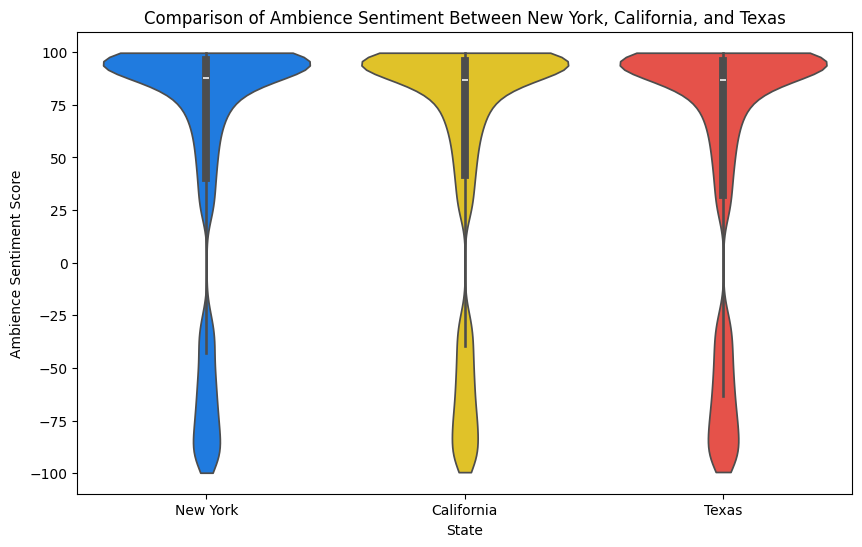

In [9]:
ambience_data = melted_df[melted_df['Aspect'] == 'Ambience']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=ambience_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Ambience Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Ambience Sentiment Score')
plt.savefig('../imgs/ambience_comparison.png', dpi=300)
plt.show()
plt.close()

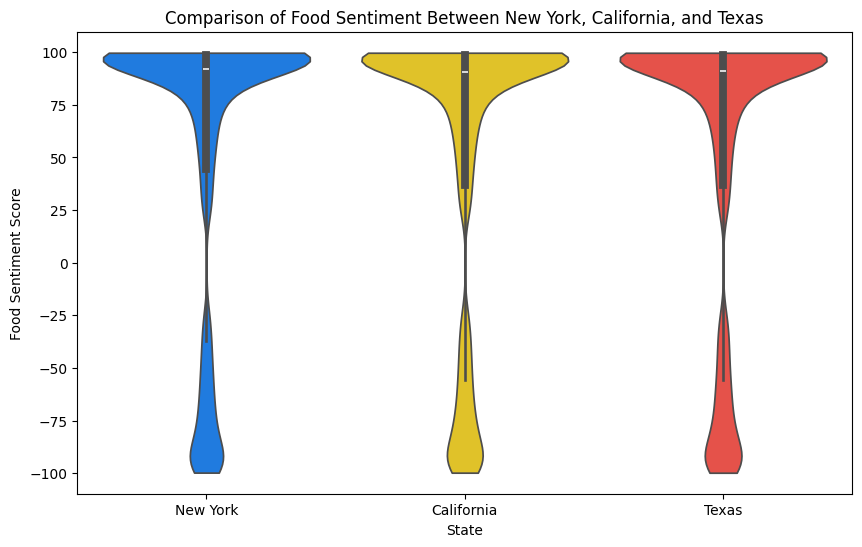

In [10]:
food_data = melted_df[melted_df['Aspect'] == 'Food']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=food_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Food Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Food Sentiment Score')
plt.savefig('../imgs/food_comparison.png', dpi=300)
plt.show()
plt.close()

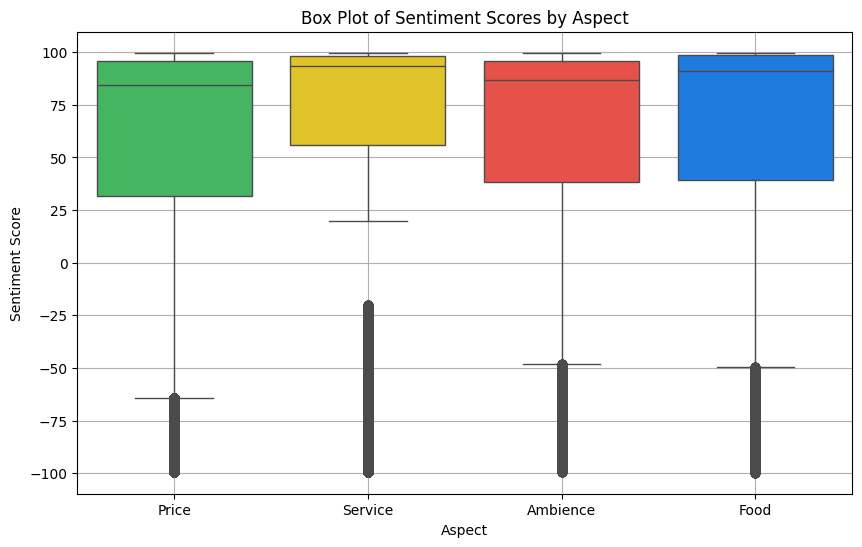

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aspect', y='Sentiment Score', data=melted_df, hue='Aspect', palette=aspect_color_palette, legend=False)
plt.title('Box Plot of Sentiment Scores by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.savefig('../imgs/box_plot.png', dpi=300)
plt.show()
plt.close()

In [12]:
stars_df = pd.read_csv('../data/review_sentiments_stars.csv')
stars_df.head()

,Stars,Price,Service,Ambience,Food
0,4,95.288551,97.628863,92.234720,88.897945
1,5,93.299860,95.128507,93.034507,85.638448
2,3,-82.298439,-84.439832,-69.404452,-66.739477
3,5,87.124357,96.371484,89.717136,84.821187
4,1,-87.897039,-83.790696,-60.608087,-99.370605


In [13]:
combined_df = pd.concat([geo_df, stars_df['Stars']], axis=1)
combined_df.head()

,State,Price,Service,Ambience,Food,Stars
0,New York,95.288551,97.628863,92.234720,88.897945,4
1,New York,93.299860,95.128507,93.034507,85.638448,5
2,New York,-82.298439,-84.439832,-69.404452,-66.739477,3
3,New York,87.124357,96.371484,89.717136,84.821187,5
4,New York,-87.897039,-83.790696,-60.608087,-99.370605,1


In [14]:
aspects = ['Price', 'Service', 'Ambience', 'Food']

In [15]:
positive_df = combined_df[combined_df['Stars'].isin([4, 5])]
positive_ny_count = positive_df[positive_df['State'] == 'New York'].shape[0]
positive_tx_count = positive_df[positive_df['State'] == 'Texas'].shape[0]
positive_ca_count = positive_df[positive_df['State'] == 'California'].shape[0]
positive_df = positive_df.groupby('State').mean().reset_index()
positive_df.head()

,State,Price,Service,Ambience,Food,Stars
0,California,67.559717,79.224989,68.745509,65.998923,4.759896
1,New York,69.054900,80.828696,69.703772,69.844405,4.741811
2,Texas,69.941613,81.207863,68.926612,69.165020,4.800008


In [16]:
# Aspect means across positive star ratings (i.e. 4 & 5 stars)
fig_positive = go.Figure()

new_york_row = positive_df.loc[positive_df['State'] == 'New York']
new_york_r = new_york_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
new_york_r.append(new_york_r[0])

# New York
fig_positive.add_trace(go.Scatterpolar(
      r=new_york_r,
      theta=aspects + [aspects[0]],
      name='New York',
      line=dict(color='#007AFF') # Blue
))

texas_row = positive_df.loc[positive_df['State'] == 'Texas']
texas_r = texas_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
texas_r.append(texas_r[0])

california_row = positive_df.loc[positive_df['State'] == 'California']
california_r = california_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
california_r.append(california_r[0])

# California
fig_positive.add_trace(go.Scatterpolar(
      r=california_r,
      theta=aspects + [aspects[0]],
      name='California',
      line=dict(color='#FFD60A') # Yellow
))

# Texas
fig_positive.add_trace(go.Scatterpolar(
      r=texas_r,
      theta=aspects + [aspects[0]],
      name='Texas',
      line=dict(color='#FF3B30') # Red
))

fig_positive.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[65, 85]
        )
    ),
    title=dict(
        text='Comparison of Aspect Means for Positive Reviews Between New York, California, and Texas',
        font=dict(size=14),
        x=0.5,
        y=0.95
    ),
    annotations=[
        dict(
            x=1.2, y=0, xref="paper", yref="paper",
            text=f"New York: {positive_ny_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.05, xref="paper", yref="paper",
            text=f"California: {positive_ca_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.10, xref="paper", yref="paper",
            text=f"Texas: {positive_tx_count} reviews", showarrow=False, align='center'
        )
    ],
    margin=dict(l=50, r=50, t=100, b=50)
)

fig_positive.write_image('../imgs/positive_radar_chart.png', scale=3)
fig_positive.show()

In [17]:
neutral_df = combined_df[combined_df['Stars'].isin([3])]
neutral_ny_count = neutral_df[neutral_df['State'] == 'New York'].shape[0]
neutral_tx_count = neutral_df[neutral_df['State'] == 'Texas'].shape[0]
neutral_ca_count = neutral_df[neutral_df['State'] == 'California'].shape[0]
neutral_df = neutral_df.groupby('State').mean().reset_index()
neutral_df.head()

,State,Price,Service,Ambience,Food,Stars
0,California,1.291722,8.775010,18.068309,19.332768,3.0
1,New York,6.362258,11.902038,20.702458,23.095939,3.0
2,Texas,-0.007790,6.765006,17.136833,23.571101,3.0


In [18]:
# Aspect means across neutral star ratings (i.e. 3 stars)
fig_neutral = go.Figure()

new_york_row = neutral_df.loc[neutral_df['State'] == 'New York']
new_york_r = new_york_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
new_york_r.append(new_york_r[0])

# New York
fig_neutral.add_trace(go.Scatterpolar(
      r=new_york_r,
      theta=aspects + [aspects[0]],
      name='New York',
      line=dict(color='#007AFF') # Blue
))

texas_row = neutral_df.loc[neutral_df['State'] == 'Texas']
texas_r = texas_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
texas_r.append(texas_r[0])

california_row = neutral_df.loc[neutral_df['State'] == 'California']
california_r = california_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
california_r.append(california_r[0])

# California
fig_neutral.add_trace(go.Scatterpolar(
      r=california_r,
      theta=aspects + [aspects[0]],
      name='California',
      line=dict(color='#FFD60A') # Yellow
))

# Texas
fig_neutral.add_trace(go.Scatterpolar(
      r=texas_r,
      theta=aspects + [aspects[0]],
      name='Texas',
      line=dict(color='#FF3B30') # Red
))

# Update radial axis range
fig_neutral.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-5, 25])
    ),
    title=dict(
        text='Comparison of Aspect Means for Neutral Reviews Between New York, California, and Texas',
        font=dict(size=14),
        x=0.5,
        y=0.95
    ),
    annotations=[
        dict(
            x=1.2, y=0, xref="paper", yref="paper",
            text=f"New York: {neutral_ny_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.05, xref="paper", yref="paper",
            text=f"California: {neutral_ca_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.10, xref="paper", yref="paper",
            text=f"Texas: {neutral_tx_count} reviews", showarrow=False, align='center'
        )
    ],
    margin=dict(l=50, r=50, t=100, b=50)
)

fig_neutral.write_image('../imgs/neutral_radar_chart.png', scale=3)
fig_neutral.show()

In [19]:
negative_df = combined_df[combined_df['Stars'].isin([1, 2])]
negative_ny_count = negative_df[negative_df['State'] == 'New York'].shape[0]
negative_tx_count = negative_df[negative_df['State'] == 'Texas'].shape[0]
negative_ca_count = negative_df[negative_df['State'] == 'California'].shape[0]
negative_df = negative_df.groupby('State').mean().reset_index()
negative_df.head()

,State,Price,Service,Ambience,Food,Stars
0,California,-60.755409,-63.765800,-49.277856,-39.547040,1.368112
1,New York,-62.357642,-65.855398,-50.579384,-40.069918,1.345375
2,Texas,-64.648787,-67.367674,-51.603862,-40.122461,1.314000


In [20]:
# Aspect means across negative star ratings (i.e. 1 & 2 stars)
fig_negative = go.Figure()

new_york_row = negative_df.loc[negative_df['State'] == 'New York']
new_york_r = new_york_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
new_york_r.append(new_york_r[0])

# New York
fig_negative.add_trace(go.Scatterpolar(
      r=new_york_r,
      theta=aspects + [aspects[0]],
      name='New York',
      line=dict(color='#007AFF') # Blue
))

texas_row = negative_df.loc[negative_df['State'] == 'Texas']
texas_r = texas_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
texas_r.append(texas_r[0])

california_row = negative_df.loc[negative_df['State'] == 'California']
california_r = california_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
california_r.append(california_r[0])

# California
fig_negative.add_trace(go.Scatterpolar(
      r=california_r,
      theta=aspects + [aspects[0]],
      name='California',
      line=dict(color='#FFD60A') # Yellow
))

# Texas
fig_negative.add_trace(go.Scatterpolar(
      r=texas_r,
      theta=aspects + [aspects[0]],
      name='Texas',
      line=dict(color='#FF3B30') # Red
))

# Update radial axis range
fig_negative.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-40, -70])
    ),
    title=dict(
        text='Comparison of Aspect Means for Negative Reviews Between New York, California, and Texas',
        font=dict(size=14),
        x=0.5,
        y=0.95
    ),
    annotations=[
        dict(
            x=1.2, y=0, xref="paper", yref="paper",
            text=f"New York: {negative_ny_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.05, xref="paper", yref="paper",
            text=f"California: {negative_ca_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.10, xref="paper", yref="paper",
            text=f"Texas: {negative_tx_count} reviews", showarrow=False, align='center'
        )
    ],
    margin=dict(l=50, r=50, t=100, b=50)
)

fig_negative.write_image('../imgs/negative_radar_chart.png', scale=3)
fig_negative.show()

In [21]:
mean_df = geo_df.groupby('State').mean().reset_index()
ny_count = geo_df[geo_df['State'] == 'New York'].shape[0]
tx_count = geo_df[geo_df['State'] == 'Texas'].shape[0]
ca_count = geo_df[geo_df['State'] == 'California'].shape[0]
mean_df.head()

,State,Price,Service,Ambience,Food
0,California,48.283440,57.992054,53.286465,51.413607
1,New York,48.604038,58.002541,53.045572,53.849223
2,Texas,46.321807,55.003608,50.052024,51.442139


In [22]:
# Aspect means across all star ratings
fig_all = go.Figure()

new_york_row = mean_df.loc[mean_df['State'] == 'New York']
new_york_r = new_york_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
new_york_r.append(new_york_r[0])

# New York
fig_all.add_trace(go.Scatterpolar(
      r=new_york_r,
      theta=aspects + [aspects[0]],
      name='New York',
      line=dict(color='#007AFF') # Blue
))

texas_row = mean_df.loc[mean_df['State'] == 'Texas']
texas_r = texas_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
texas_r.append(texas_r[0])

california_row = mean_df.loc[mean_df['State'] == 'California']
california_r = california_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
california_r.append(california_r[0])

# California
fig_all.add_trace(go.Scatterpolar(
      r=california_r,
      theta=aspects + [aspects[0]],
      name='California',
      line=dict(color='#FFD60A') # Yellow
))

# Texas
fig_all.add_trace(go.Scatterpolar(
      r=texas_r,
      theta=aspects + [aspects[0]],
      name='Texas',
      line=dict(color='#FF3B30') # Red
))

# Update radial axis range
fig_all.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[40, 60])
    ),
    title=dict(
        text='Comparison of Aspect Means for All Reviews Between New York, California, and Texas',
        font=dict(size=14),
        x=0.5,
        y=0.95
    ),
    annotations=[
        dict(
            x=1.2, y=0, xref="paper", yref="paper",
            text=f"New York: {ny_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.05, xref="paper", yref="paper",
            text=f"California: {ca_count} reviews", showarrow=False, align='center'
        ),
        dict(
            x=1.2, y=-0.10, xref="paper", yref="paper",
            text=f"Texas: {tx_count} reviews", showarrow=False, align='center'
        )
    ],
    margin=dict(l=50, r=50, t=100, b=50)
)

fig_all.write_image('../imgs/radar_chart.png', scale=3)
fig_all.show()